<a href="https://colab.research.google.com/github/ElectroLic/AI-Lab-NTU-Singapore-/blob/main/ViT_24_layers_2048_dimension_50mil_parameter_ipynb%EF%BC%88lzl%EF%BC%89.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
train_dir = "/content/drive/MyDrive/AI Lab  NTU Singapore/Pneumonia/train"
test_dir = "/content/drive/MyDrive/AI Lab  NTU Singapore/Pneumonia/test"

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
pip install tensorflow

In [5]:
import os

In [6]:
import numpy as np

In [7]:
from transformers import ViTFeatureExtractor

In [8]:
pip install keras

In [9]:
from PIL import Image, ImageOps

In [10]:
model = ViTFeatureExtractor.from_pretrained('google/vit-base-patch16-224')

preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


In [12]:
img = Image.open("/content/drive/MyDrive/AI Lab  NTU Singapore/Pneumonia/test/NORMAL/IM-0001-0001.jpeg")

In [13]:
img = img.resize((150, 150))

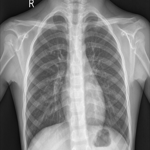

In [14]:
img

In [15]:
img = ImageOps.colorize(img, black = "black", white = "white")

In [16]:
img = model(images = img)

In [17]:
img = img['pixel_values']

In [18]:
img = np.array(img)

In [19]:
img = img.flatten()

In [20]:
img.shape

(150528,)

In [ ]:
X_train = []
y_train = []
counter = 1

for i in os.listdir(train_dir):
  for j in os.listdir(train_dir+"/"+i):
    try:
      img = Image.open(train_dir+"/"+i+"/"+j)
      img = img.resize((150, 150))
      img = ImageOps.colorize(img,black="black",white="white")
      img = model(images=img)
      img = img['pixel_values']
      img = np.array(img)
      img = img.flatten()
      X_train.append(img)
      y_train.append(i)
    except:
      print(counter)
      counter+=1

In [ ]:
X_test = []
y_test = []
counter = 1

for i in os.listdir(test_dir):
  for j in os.listdir(train_dir+"/"+i):
    try:
      img = Image.open(train_dir+"/"+i+"/"+j)
      img = img.resize((150, 150))
      img = ImageOps.colorize(img,black="black",white="white")
      img = model(images=img)
      img = img['pixel_values']
      img = np.array(img)
      img = img.flatten()
      X_train.append(img)
      y_train.append(i)
    except:
      print(counter)
      counter+=1